In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from networkx.algorithms.community import greedy_modularity_communities
from matplotlib.colors import ListedColormap
!pip install seaborn


<class 'ModuleNotFoundError'>: No module named 'seaborn'

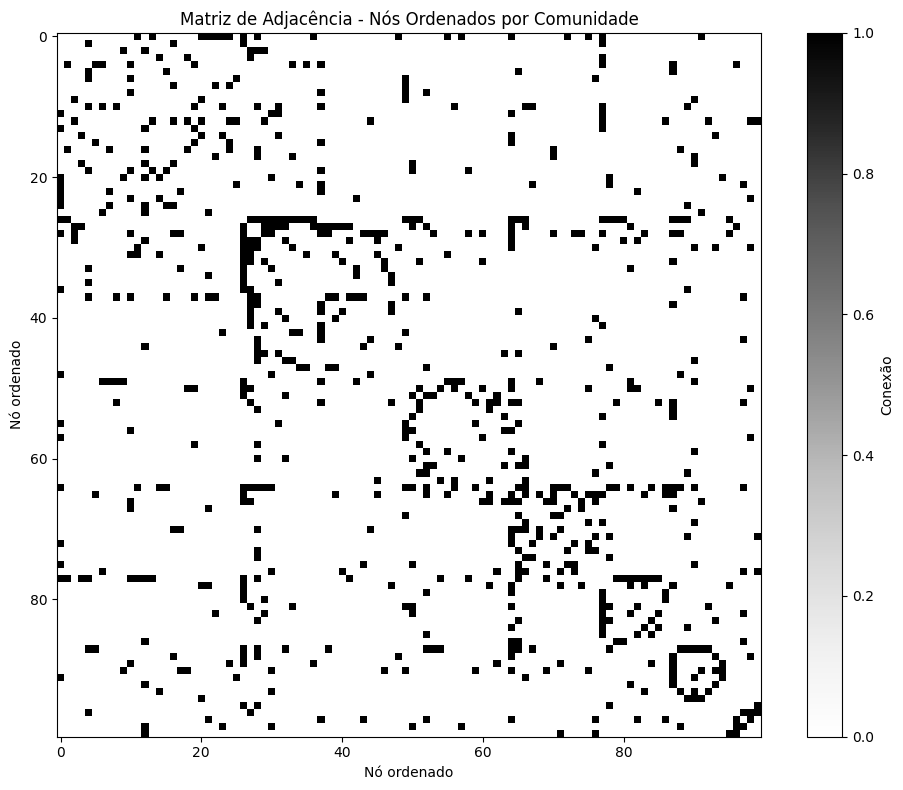

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community import greedy_modularity_communities

# Carrega a rede
edges = []
with open("scale_free_network.txt") as f:
    for line in f:
        if line.strip():
            u, v = map(int, line.strip().split())
            edges.append((u, v))

G = nx.Graph()
G.add_edges_from(edges)

# Detectar comunidades
communities = greedy_modularity_communities(G)

# Mapeamento de comunidade
node_community = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_community[node] = i

# Ordenar nós por comunidade
sorted_nodes = sorted(G.nodes(), key=lambda x: node_community[x])
adj_matrix = nx.to_numpy_array(G, nodelist=sorted_nodes)

# Plot usando matplotlib puro
plt.figure(figsize=(10, 8))
plt.imshow(adj_matrix, cmap='Greys', interpolation='none')
plt.title("Matriz de Adjacência - Nós Ordenados por Comunidade")
plt.xlabel("Nó ordenado")
plt.ylabel("Nó ordenado")
plt.colorbar(label="Conexão")
plt.tight_layout()
plt.show()
